In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.patches as patches

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [2]:
data = pd.read_csv("banknote_dataset.csv")

In [3]:
print ("V1 - variance")
print ("V2 - skeweness")
data

V1 - variance
V2 - skeweness


,V1,V2
0,3.62160,8.66610
1,4.54590,8.16740
2,3.86600,-2.63830
3,3.45660,9.52280
4,0.32924,-4.45520
...,...,...
1367,0.40614,1.34920
1368,-1.38870,-4.87730
1369,-3.75030,-13.45860
1370,-3.56370,-8.38270


In [4]:
#normalization
v_min = np.min(np.array(data["V1"]))
v_max = np.max(np.array(data["V1"]))
variance_norm = (data["V1"] - v_min)/(v_max - v_min)


s_min = np.min(np.array(data["V2"]))
s_max = np.max(np.array(data["V2"]))
skeweness_norm = (data["V2"] - s_min)/(s_max - s_min)

print (v_min, v_max)
print (s_min, s_max)

-7.0421 6.8248
-13.7731 12.9516


In [27]:
#mean
v_mean = np.mean(variance_norm)
s_mean = np.mean(skeweness_norm)

#std
v_std = np.std(variance_norm)
s_std = np.std(skeweness_norm)

print (v_mean, v_std)
print (s_mean, s_std)

0.5391136632764809 0.2049287443629144
0.5873013774145724 0.21953127587108529


In [28]:
#normalization
v_min = np.min(np.array(data["V1"]))
v_max = np.max(np.array(data["V1"]))
variance_norm = (data["V1"] - v_min)/(v_max - v_min)


s_min = np.min(np.array(data["V2"]))
s_max = np.max(np.array(data["V2"]))
skeweness_norm = (data["V2"] - s_min)/(s_max - s_min)

print (v_min, v_max)
print (s_min, s_max)

-7.0421 6.8248
-13.7731 12.9516


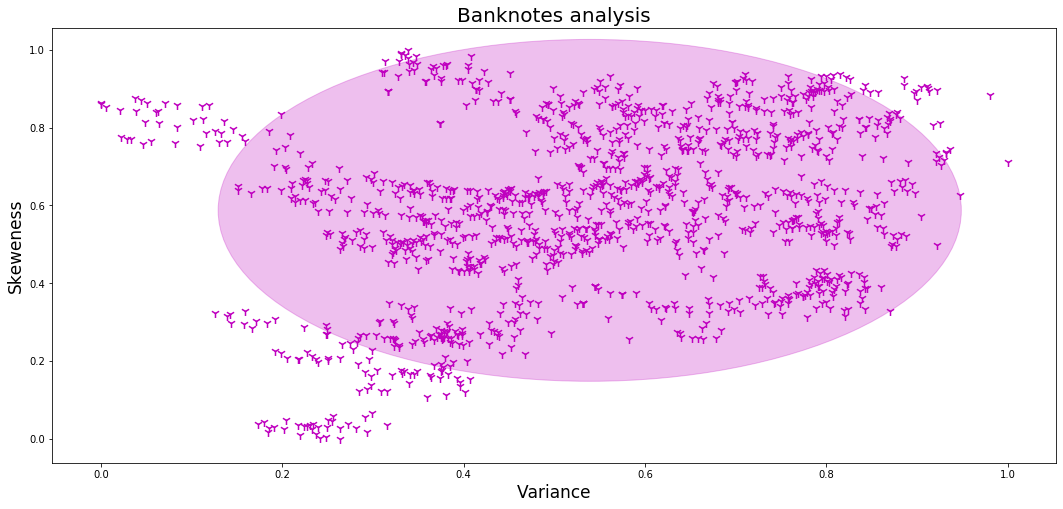

In [6]:
fig, graph = plt.subplots()

graph.scatter(variance_norm, skeweness_norm, color = 'm', marker = "1", s = 80)
plt.xlabel("Variance", fontsize = 17)
plt.ylabel("Skeweness", fontsize = 17)
plt.title("Banknotes analysis", fontsize = 20)
#graph.scatter(v_mean, s_mean)
#graph.scatter(v_std, s_std)

ellipse = patches.Ellipse([v_mean, s_mean], v_std*4, s_std*4, alpha = 0.25, color = 'm')
graph.add_patch(ellipse)
plt.style.use('ggplot')

In [24]:
result = KMeans(n_clusters=2).fit(np.column_stack((variance_norm, skeweness_norm)))

xval_0=[]
yval_0=[]
xval_1=[]
yval_1=[]

for i in range(0, variance_norm.size):
    if(result.labels_[i] == 1):
        xval_0.append(variance_norm[i])
        yval_0.append(skeweness_norm[i])
    else:
        xval_1.append(variance_norm[i])
        yval_1.append(skeweness_norm[i])

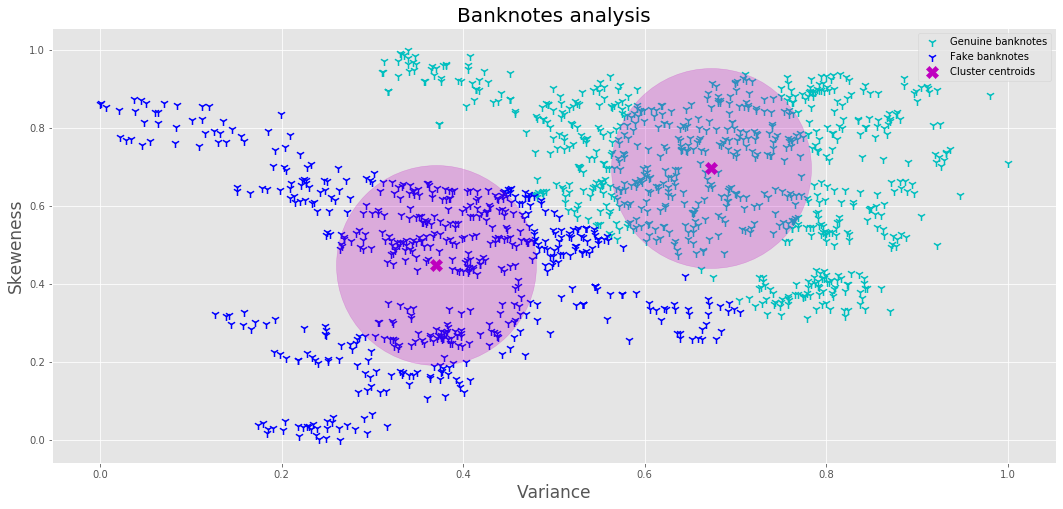

In [26]:
fig1 = plt.subplot()
fig1.scatter(xval_0,yval_0, c="c", marker = "1", s = 80, label = "Genuine banknotes")
fig1.scatter(xval_1,yval_1, c="b", marker = "1", s = 80, label = "Fake banknotes")
fig1.scatter(result.cluster_centers_[:,0], result.cluster_centers_[:,1], c="m", s=150, marker = "X", label = "Cluster centroids")
fig1.scatter(result.cluster_centers_[:,0], result.cluster_centers_[:,1], c="m", s=40000,  alpha = 0.25)
plt.title("Banknotes analysis", fontsize = 20)
plt.xlabel("Variance", fontsize = 17)
plt.ylabel("Skeweness", fontsize = 17)
plt.legend()
plt.show()

In [9]:
result = KMeans(n_clusters=2).fit(np.column_stack((variance_norm, skeweness_norm)))

xval_0=[]
yval_0=[]
xval_1=[]
yval_1=[]

for i in range(0, variance_norm.size):
    if(result.labels_[i] == 0):
        xval_0.append(variance_norm[i])
        yval_0.append(skeweness_norm[i])
    else:
        xval_1.append(variance_norm[i])
        yval_1.append(skeweness_norm[i])

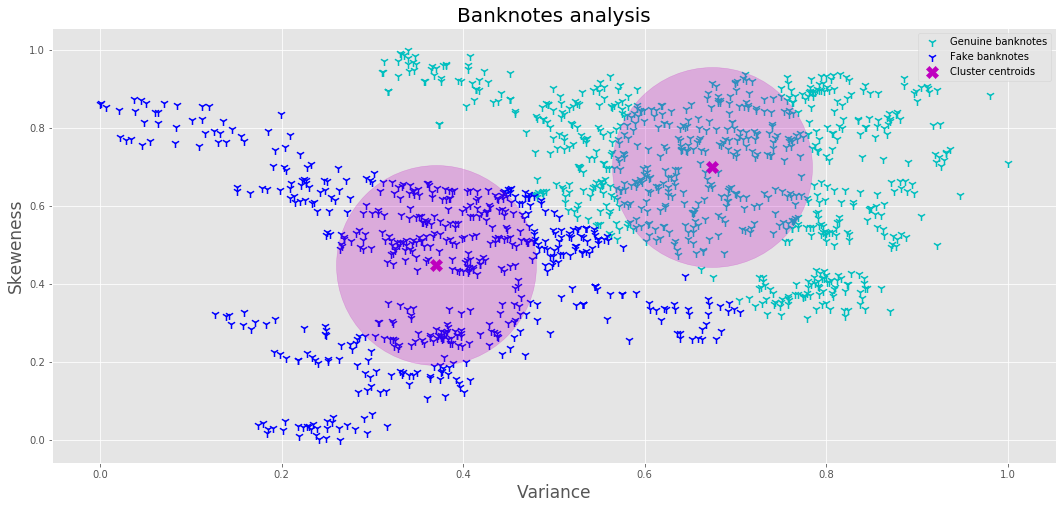

In [20]:
fig1 = plt.subplot()
fig1.scatter(xval_0,yval_0, c="c", marker = "1", s = 80, label = "Genuine banknotes")
fig1.scatter(xval_1,yval_1, c="b", marker = "1", s = 80, label = "Fake banknotes")
fig1.scatter(result.cluster_centers_[:,0], result.cluster_centers_[:,1], c="m", s=150, marker = "X", label = "Cluster centroids")
fig1.scatter(result.cluster_centers_[:,0], result.cluster_centers_[:,1], c="m", s=40000,  alpha = 0.25)
plt.title("Banknotes analysis", fontsize = 20)
plt.xlabel("Variance", fontsize = 17)
plt.ylabel("Skeweness", fontsize = 17)
plt.legend()
plt.show()

In [15]:
print (result)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
